In [114]:
import os
import shutil
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sn
import tensorflow as tf

import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from scipy import interpolate
import tensorboard as tb

from glob import glob
from IPython.display import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K

In [2]:
path = "/data/patchcamelyon/"
train_path = path + 'train/'
test_path = path + 'test/'
labels = pd.read_csv('/data/patchcamelyon/train_labels.csv')

Text(0, 0.5, 'Benign')

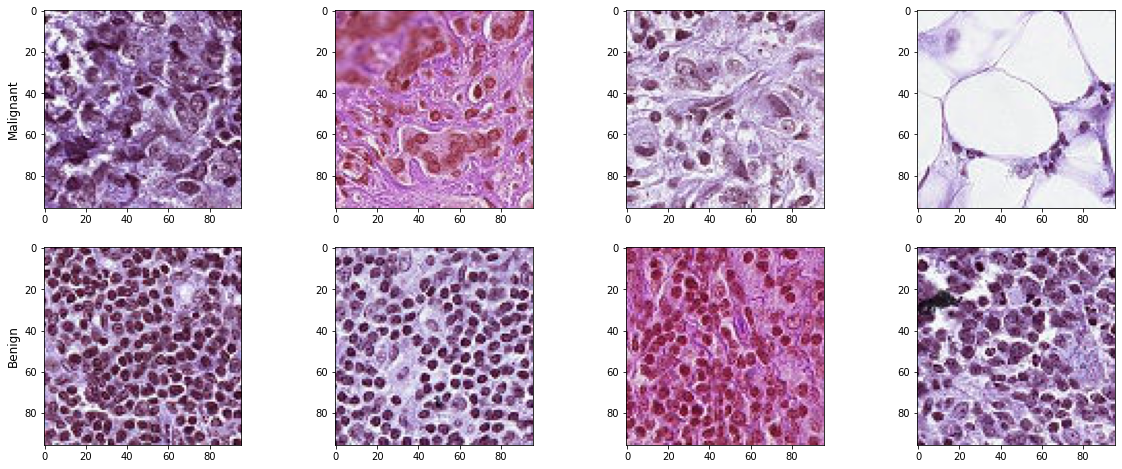

In [3]:
positive_samples = labels.loc[labels['label'] == 1].sample(4)
negative_samples = labels.loc[labels['label'] == 0].sample(4)
positive_images = []
negative_images = []

for sample in positive_samples['id']:
    path = os.path.join(train_path, sample+'.tif')
    img = cv.imread(path)
    positive_images.append(img)
        
for sample in negative_samples['id']:
    path = os.path.join(train_path, sample+'.tif')
    img = cv.imread(path)
    negative_images.append(img)

fig,axis = plt.subplots(2,4,figsize=(20,8))
fig.suptitle('',fontsize=20)
for i,img in enumerate(positive_images):
    axis[0,i].imshow(img)
axis[0,0].set_ylabel('Malignant', size='large')
for i,img in enumerate(negative_images):
    axis[1,i].imshow(img)
axis[1,0].set_ylabel('Benign', size='large')

Found 1 validated image filenames belonging to 1 classes.


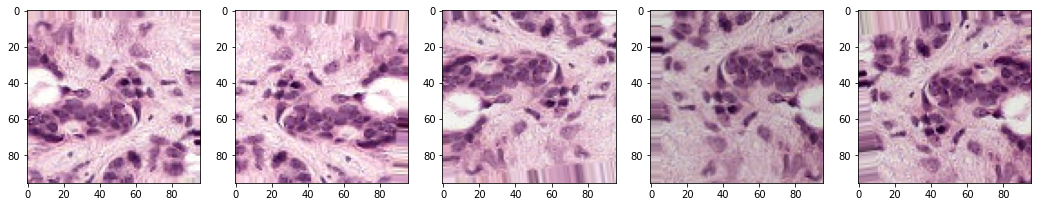

In [39]:
from keras.preprocessing.image import ImageDataGenerator

df = pd.DataFrame({'path': glob(os.path.join(train_path,'*.tif'))})
df['id'] = df.path.map(lambda x: ((x.split("n")[2].split('.')[0])[1:]))
df = df.merge(labels, on = "id")
df = df[df['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']
df = df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
df = df[df['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
df = df[df['id'] != 'f6f1d771d14f7129a6c3ac2c220d90992c30c10b']
df = df[df['id'] != '9071b424ec2e84deeb59b54d2450a6d0172cf701']
df = df[df['id'] != 'c448cd6574108cf14514ad5bc27c0b2c97fc1a83']
df = df[df['id'] != '54df3640d17119486e5c5f98019d2a92736feabc']
df = df[df['id'] != '5f30d325d895d873d3e72a82ffc0101c45cba4a8']
df = df[df['id'] != '5a268c0241b8510465cb002c4452d63fec71028a']
df['label'] = df['label'].astype(str)

data_generator = ImageDataGenerator(
    rescale=1./255,
    vertical_flip = True,
    horizontal_flip = True,
    rotation_range=10,
    brightness_range=(0.8, 1.2),
    channel_shift_range=16,
    zoom_range=0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1)

df = df[df['id'] == 'fffb7bdd4a08e7822edcb52ccb19695e339e920d']
imagegen = data_generator.flow_from_dataframe(
            dataframe = df, 
            x_col = 'path', 
            y_col = 'label',
            target_size = (96, 96),
            batch_size=1)

fig, rows =plt.subplots(nrows=1, ncols=5, figsize=(18,18))
for row in rows:
    row.imshow((imagegen.next()[0][0]*255).astype('uint8'))
plt.show()

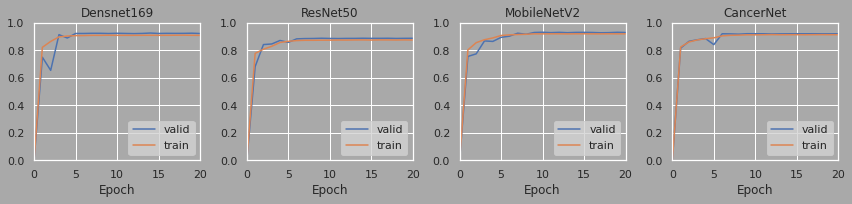

In [202]:
epochs = [i for i in range(0, 21)]
densenet_history = pd.read_csv('./experiments/2021-03-22/densenet169-2/logs/evaluation/densenet169-2.csv')
resnet_history = pd.read_csv('./experiments/2021-03-23/resnet50/logs/evaluation/resnet50.csv')
mobilenet_history = pd.read_csv('./experiments/2021-03-24/mobilenet2/logs/evaluation/mobilenet2.csv')
cancernet_history = pd.read_csv('./experiments/2021-03-24/cancernet/logs/evaluation/cancernet.csv')

densenet_train = pd.concat([pd.Series([0]), densenet_history['accuracy']])
densenet_valid = pd.concat([pd.Series([0]), densenet_history['val_accuracy']])
resnet_train = pd.concat([pd.Series([0]), resnet_history['accuracy']])
resnet_valid = pd.concat([pd.Series([0]), resnet_history['val_accuracy']])
mobilenet_train = pd.concat([pd.Series([0]), mobilenet_history['accuracy']])
mobilenet_valid = pd.concat([pd.Series([0]), mobilenet_history['val_accuracy']])
cancernet_train = pd.concat([pd.Series([0]), cancernet_history['accuracy']])
cancernet_valid = pd.concat([pd.Series([0]), cancernet_history['val_accuracy']])


fig, axs = plt.subplots(ncols=4, figsize=(12, 3))
for axi in axs.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(4))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))

sns.set(rc={'axes.facecolor':'lightgray', 'figure.facecolor':'lightgray'})

sns.lineplot(x=epochs, y=densenet_valid, ax=axs[0], label="valid")
sns.lineplot(x=epochs, y=densenet_train, ax=axs[0], label="train")
axs[0].set(xlim=(0,20), ylim=(0,1), title="Densnet169", xlabel="Epoch")
axs[0].legend(loc="lower right")

sns.lineplot(x=epochs, y=resnet_valid, ax=axs[1], label="valid")
sns.lineplot(x=epochs, y=resnet_train, ax=axs[1], label="train")
axs[1].set(xlim=(0,20), ylim=(0,1), title="ResNet50", xlabel="Epoch")
axs[1].legend(loc="lower right")

sns.lineplot(x=epochs, y=mobilenet_valid, ax=axs[2], label="valid")
sns.lineplot(x=epochs, y=mobilenet_train, ax=axs[2], label="train")
axs[2].set(xlim=(0,20), ylim=(0,1), title="MobileNetV2", xlabel="Epoch")
axs[2].legend(loc="lower right")

sns.lineplot(x=epochs, y=cancernet_valid, ax=axs[3], label="valid")
sns.lineplot(x=epochs, y=cancernet_train, ax=axs[3], label="train")
axs[3].set(xlim=(0,20), ylim=(0,1), title="CancerNet", xlabel="Epoch")
axs[3].legend(loc="lower right")

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

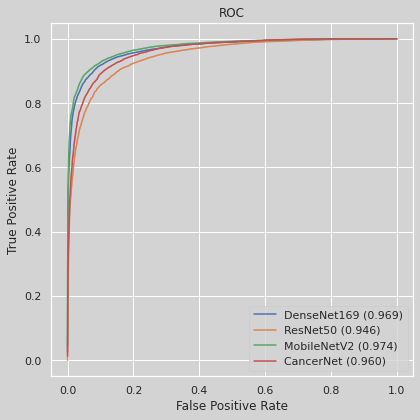

In [203]:
    plt.clf()
    plt.figure(figsize=(6, 6))
    
    densenet_roc = np.load('./experiments/2021-03-22/densenet169-2/logs/evaluation/densenet169-2-metrics.npz')
    densenet_auc = auc(densenet_roc['fpr'], densenet_roc['tpr'])
    g = sns.lineplot(x=densenet_roc['fpr'], y=densenet_roc['tpr'], label='DenseNet169 ({:.3f})'.format(densenet_auc))
    
    resnet50_roc = np.load('./experiments/2021-03-23/resnet50/logs/evaluation/resnet50-metrics.npz')
    resnet50_auc = auc(resnet50_roc['fpr'], resnet50_roc['tpr'])
    sns.lineplot(x=resnet50_roc['fpr'], y=resnet50_roc['tpr'], label='ResNet50 ({:.3f})'.format(resnet50_auc))
    
    mobilenet_roc = np.load('./experiments/2021-03-24/mobilenet2/logs/evaluation/mobilenet2-metrics.npz')
    mobilenet_auc = auc(mobilenet_roc['fpr'], mobilenet_roc['tpr'])
    sns.lineplot(x=mobilenet_roc['fpr'], y=mobilenet_roc['tpr'], label='MobileNetV2 ({:.3f})'.format(mobilenet_auc))
    
    cancernet_roc = np.load('./experiments/2021-03-24/cancernet/logs/evaluation/cancernet-metrics.npz')
    cancernet_auc = auc(cancernet_roc['fpr'], cancernet_roc['tpr'])  
    sns.lineplot(x=cancernet_roc['fpr'], y=cancernet_roc['tpr'], label='CancerNet ({:.3f})'.format(cancernet_auc))
    
    g.set(xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC")
    
    plt.tight_layout()

In [7]:
class GradCAM:
    # Adapted with some modification from https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/
    def __init__(self, model, layerName=None):
        """
        model: pre-softmax layer (logit layer)
        """
        self.model = model
        self.layerName = layerName
            
        if self.layerName == None:
            self.layerName = self.find_target_layer()
    
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM")
            
    def compute_heatmap(self, image, classIdx, upsample_size, eps=1e-5):
        gradModel = tf.keras.Model(
            inputs = [self.model.inputs],
            outputs = [self.model.get_layer(self.layerName).output, self.model.output]
        )
        # record operations for automatic differentiation
        
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOuts, preds) = gradModel(inputs) # preds after softmax
            loss = preds[:,classIdx]
        
        # compute gradients with automatic differentiation
        grads = tape.gradient(loss, convOuts)
        # discard batch
        convOuts = convOuts[0]
        grads = grads[0]
        norm_grads = tf.divide(grads, tf.reduce_mean(tf.square(grads)) + tf.constant(eps))
        
        # compute weights
        weights = tf.reduce_mean(norm_grads, axis=(0,1))
        cam = tf.reduce_sum(tf.multiply(weights, convOuts), axis=-1)
        
        # Apply reLU
        cam = np.maximum(cam, 0)
        cam = cam/np.max(cam)
        cam = cv.resize(cam, upsample_size,interpolation=cv.INTER_LINEAR)
        
        # convert to 3D
        cam3 = np.expand_dims(cam, axis=2)
        cam3 = np.tile(cam3, [1,1,3])
        
        return cam3
    
def overlay_gradCAM(img, cam3, prob):
    cam3 = np.uint8(255*cam3*prob)
    cam3 = cv.applyColorMap(cam3, cv.COLORMAP_JET)
    
    new_img = 0.3*cam3 + 0.5*img
    
    return (new_img*255.0/new_img.max()).astype("uint8")

In [8]:
@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

# Reference: https://github.com/eclique/keras-gradcam with adaption to tensorflow 2.0  
class GuidedBackprop:
    def __init__(self,model, layerName=None):
        self.model = model
        self.layerName = layerName
        self.gbModel = self.build_guided_model()
        
        if self.layerName == None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply Guided Backpropagation")

    def build_guided_model(self):
        gbModel = tf.keras.Model(
            inputs = [self.model.inputs],
            outputs = [self.model.get_layer(self.layerName).output]
        )
        layer_dict = [layer for layer in gbModel.layers[1:] if hasattr(layer,"activation")]
        for layer in layer_dict:
            if layer.activation == tf.keras.activations.relu:
                layer.activation = guidedRelu
        
        return gbModel
    
    def guided_backprop(self, images, upsample_size):
        """Guided Backpropagation method for visualizing input saliency."""
        with tf.GradientTape() as tape:
            inputs = tf.cast(images, tf.float32)
            tape.watch(inputs)
            outputs = self.gbModel(inputs)

        grads = tape.gradient(outputs, inputs)[0]

        saliency = cv.resize(np.asarray(grads), upsample_size)

        return saliency

def deprocess_image(x):
    """Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x = x.copy()
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [9]:
def show_gradCAMs(model, gradCAM, guidedBP, im_path):
    """
    model: softmax layer
    """
    plt.subplots(figsize=(10, 10))

    img = cv.imread(im_path)
    upsample_size = (img.shape[1],img.shape[0])
    
    # Show original image
    plt.subplot(1,3,1)
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    plt.title("Filename: {}".format(im_path), fontsize=20)
    plt.axis("off")
    
    # Show overlayed grad
    plt.subplot(1,3,2)
    im = img_to_array(load_img(os.path.join(im_path), target_size=(96,96)))
    x = np.expand_dims(im, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print('probability', preds[0])
    idx = preds.argmax()
    cam3 = gradCAM.compute_heatmap(image=x, classIdx=idx, upsample_size=upsample_size)
    new_img = overlay_gradCAM(img, cam3, preds[0])
    new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)
    plt.imshow(new_img)
    #plt.title("GradCAM - Pred: {}. Prob: {}".format(res[0],res[1]), fontsize=20)
    plt.axis("off")
        
    # Show guided GradCAM
    plt.subplot(1,3,3)
    gb = guidedBP.guided_backprop(x, upsample_size)
    guided_gradcam = deprocess_image(gb*cam3)
    guided_gradcam = cv.cvtColor(guided_gradcam, cv.COLOR_BGR2RGB)
    plt.imshow(guided_gradcam)
    plt.title("Guided GradCAM", fontsize=20)
    plt.axis("off")
        
    plt.show()

In [10]:
model_logit = tf.keras.Model(model.input,model.layers[-2].output)
gradCAM = GradCAM(model=model_logit, layerName="conv3_block4_out")
#gradCAM = GradCAM(model=model_logit, layerName="conv4_block6_out")
#gradCAM = GradCAM(model=model_logit, layerName="conv5_block3_out")

guidedBP = GuidedBackprop(model=model, layerName="conv5_block3_out")

probability [0.99521697]


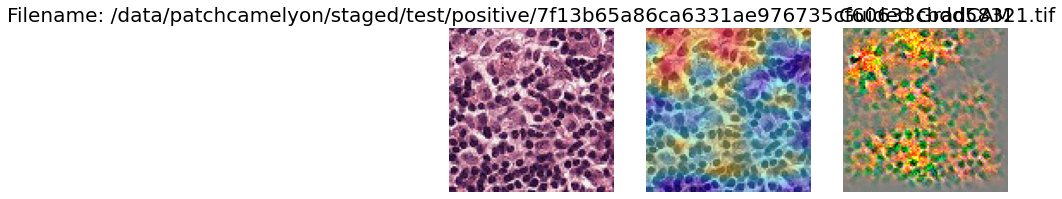

In [11]:
img_path = '/data/patchcamelyon/staged/test/positive/7f13b65a86ca6331ae976735cf60633cbdd58321.tif'
show_gradCAMs(model, gradCAM, guidedBP, img_path)

probability [0.0349868]


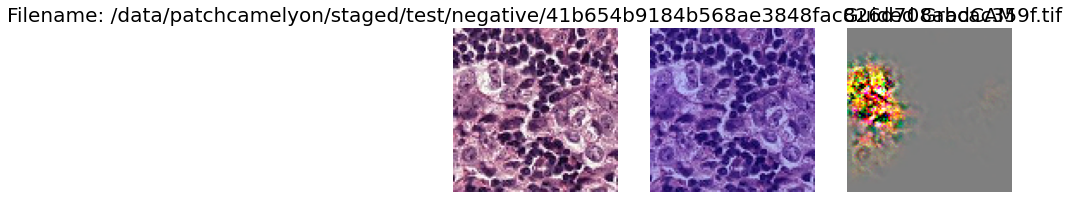

In [12]:
img_path = '/data/patchcamelyon/staged/test/negative/41b654b9184b568ae3848fac826d708abcac359f.tif'
show_gradCAMs(model, gradCAM, guidedBP, img_path)